p(m)=0.2, p(551)=0.4, p(p)=0.1, p(s)=0.3

In [ ]:
import random

mcount=0
ccount=0
pcount=0
scount=0
for i in range(100):
    x=random.uniform(0,1)
    if x<=0.2:
        mcount+=1
    if 0.2<x<=0.6: 
        ccount+=1
    if 0.6<x<= 0.7: 
        pcount+=1
    if 0.7<x<=1.0:
        scount+=1 
    #return mcount, ccount, pcount, scount 
print(mcount/100)
print(ccount/100)
print(pcount/100)
print(scount/100)

    

In [ ]:
mcount=0
ccount=0
pcount=0
scount=0
for i in range(1000):
    x=random.uniform(0,1)
    if x<=0.2:
        mcount+=1
    if 0.2<x<=0.6: 
        ccount+=1
    if 0.6<x<= 0.7: 
        pcount+=1
        
    if 0.7<x<=1.0: 
        scount+=1 
    #return mcount, ccount, pcount, scount 
print(mcount/1000)
print(ccount/1000)
print(pcount/1000)
print(scount/1000)

Increasing the sample size from 100 to 1000, the probabilities associated with each activity becomes closer and closer to the underlying multinomial distribution. 

############## MODEL SELECTION ############### 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train=pd.read_csv(r'~/Downloads/Datasets/Dataset_1_train.csv', header=None, usecols=(0,1))

size=len(train)
x=np.asarray(train[0])
y=np.asarray(train[1])

# finding minimal w via (X^TX)^-1(X^T)Y
def findingw(size, poly, x, y):
    x1=np.ndarray(shape=(size,poly))
    for i in range(size):
        for j in range(1,poly):
            x1[i][0]=1
            x1[i][j]=x[i]**(j)
    x1.transpose()
    xx_tranpose=np.matmul(x1.transpose(),x1)
    x_inverse=np.linalg.inv(xx_tranpose)
    w_values=np.matmul(x_inverse,np.matmul(x1.transpose(),y))
    return w_values

w_values= findingw(size, 21, x,y)


# Method shows you predicted y values 
def function(w_values,x):
    y_predicted=[0 for i in range(len(x))]
    for j in range(len(x)):
        sum=0
        for i in range(len(w_values)):
            if i==0:
                y=w_values[0]
                sum+=y
            else:
                y1=(w_values[i]*((x[j])**i))
                sum+=y1
        y_predicted[j]=sum
    return y_predicted

y_predicted=function(w_values,x)

# Method gives you MSE values
def mse(y_predicted,y_actual):
    error =((np.sum(np.square(y_predicted-y_actual))))
    MSE = error/(len(y_actual))
    return MSE

MSE= mse(y_predicted,train[1])
print('MSE for training:', MSE)

valid=pd.read_csv(r'~/Downloads/Datasets/Dataset_1_valid.csv', header=None, keep_default_na=False)
# train[0] is seen as the column for x while y is seen as the column for y 

size=len(train)
v=valid[0]
yv=valid[1]
v1=np.ndarray(shape=(size,21))

y_predicted=function(w_values,v)
MSE_valid=mse(y_predicted, yv)
print('MSE for validation:',MSE_valid)

x=train[0]
y=train[1]

new_x=np.linspace(min(x),max(x),100)
y_predicted1=function(w_values,new_x)

############# Visualizing the fit ##############
plt.title("Model Selection for Dataset 1")
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.plot(x,y,'o',new_x, y_predicted1,'-g')



In [ ]:
############# ADDING REGULARIZATION #############
test=pd.read_csv(r'~/Downloads/Datasets/Dataset_1_test.csv', header=None, keep_default_na=False)

# ensures that pheta0 is not being penalized
def regularizematrix(size,poly):
    matrix=np.ndarray(shape=(size,size))
    for i in range(poly): 
        for j in range(poly): 
            matrix[0][0] = 0 
            if (i==j): 
                matrix[i][j] = 1
    return matrix 

x=np.asarray(train[0])
y=np.asarray(train[1])
v=np.asarray(valid[0])
yv=np.asarray(valid[1])


# making linear regression 
def linreg(size,poly,x):
    x1=np.ndarray(shape=(size,poly))
    for i in range(size):
        for j in range(1,poly):
            x1[i][0]=1
            x1[i][j]=x[i]**(j)
    return x1

    size = len(x_values[0])
    length =len(x_values)
    #print(length)

# finding w values for regularization 
def findingw_regularize(size, poly, x, y, l):
    length=len(x)
    x1=np.ndarray(shape=(size,poly))
    for i in range(size):
        for j in range(1,poly):
            x1[i][0]=1
            x1[i][j]=x[i]**(j)
    x1.transpose()
    xx_tranpose=np.matmul(x1.transpose(),x1)
    length=(len(xx_tranpose))
    x_inverse=np.linalg.inv(xx_tranpose + (np.identity(length)*l))
    w_values=np.matmul(x_inverse,np.matmul(x1.transpose(),y))
    return w_values


def testL2(size,x,y,poly,l):
    bestindex=0
    bestMSE=10
    trainingvalues=[]
    validationvalues=[]
    lambdavalues=np.logspace(-4,0,1000)
    # where l is the value of lambda
    for i in lambdavalues:
        # finding w values for regularization 
        w_values=findingw_regularize(size,poly,x,y,i)
        y_values=function(w_values,x)
        MSEvalue = mse(y_values,y)
        trainingvalues.append(MSEvalue)
        #trainingplot = plt.plot(i, MSEvalue, 'ro', label='training')
        y_values_validation=function(w_values,valid[0])
        MSE_validation=mse(y_values_validation,valid[1])
        validationvalues.append(MSE_validation)
        if bestMSE>MSE_validation: 
            bestMSE=MSE_validation
            bestindex=i 
    return bestindex, bestMSE, validationvalues, trainingvalues, lambdavalues
            
Bestvalue, bestMSE, validationvalues, trainingvalues, lambdavalues=testL2(len(x),x,y,21,1)

plt.plot(lambdavalues, trainingvalues, '-g')
plt.plot(lambdavalues, validationvalues, '-r')
plt.xlabel("Lambdavalues")
plt.ylabel("MSE values")
plt.title("L2 Regularization Curve")
print("Best Lambda:", Bestvalue)

print("BestMSE:", bestMSE)
print("validationvalues:", validationvalues)
print("trainingvalues:", trainingvalues)
print("lambdavalues:", lambdavalues)




####### MODEL SELECTION
1(c) The model is overfitting. The polynomial oscillates wildly and gives a very poor representation of the data. The more flexible polynomials with larger values of M become increasingly tuned to random noise on target values. 

In [ ]:
#CALCULATE TEST PERFORMANCE
size=len(test[0])
w_values=findingw_regularize(size,20, test[0], test[1], Bestvalue)
y_test_values = function(w_values, test[0])
new_x_val= np.linspace(min(x),max(x),100)
y_new_test_values = function(w_values, new_x_val)

plt.plot(test[0], test[1], "ro", new_x_val, y_new_test_values)
plt.xlabel("x value")
plt.ylabel("y value")
plt.title("20 degree polynomial fit with L2 regularization")

Q1(d) The model 

In [ ]:
## Stochastic Gradient Descent 
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

train2=pd.read_csv(r'~/Downloads/Datasets/Dataset_2_train.csv', header=None, keep_default_na=False, usecols=[0,1])
valid2=pd.read_csv(r'~/Downloads/Datasets/Dataset_2_valid.csv', header=None, keep_default_na=False, usecols=[0,1])
test2=pd.read_csv(r'~/Downloads/Datasets/Dataset_2_test.csv', header=None, keep_default_na = False, usecols=[0,1])
    
xtest=test2[0]
ytest=test2[1]
# Finds the MSE 
def mse(w_values,x,y):
    w0=w_values[0]
    w1=w_values[1]
    error=(y-(x*(w1)+w0))**2
    error2= np.sum(error)/len(x)
    return error2

######## initializes x and y values for train and validation sets 
def initialize(train,valid):
    x_train=train[0]
    y_train=train[1]
    x_valid=valid[0]
    y_valid=valid[1]
    return x_train, y_train, x_valid, y_valid  


In [ ]:
######## SGD Implementation 

def sgdregression(train,valid,learningrate,threshold): 
    weights=[]
    mse_train=[]
    mse_valid=[]
    mse_tepoch=[]
    mse_vepoch=[]
    initial_weights=np.array([3.1,3.1],dtype=float)
    new_weights=np.array([3.5,3.5], dtype=float)
    epoch=0
    while ((np.linalg.norm(new_weights-initial_weights))>threshold) and epoch<10000:
        epoch+=1
        train=train.sample(frac=1)
        valid=valid.sample(frac=1)
        initial_weights[0]=new_weights[0]
        initial_weights[1]=new_weights[1]
        x_train, y_train, x_valid, y_valid = initialize(train,valid)
        for j in range(len(x_train)):
            print("new_weights:,", new_weights)
            new_weights[0] -= learningrate*(new_weights[0]+new_weights[1]*x_train[j]-y_train[j])
            new_weights[1] -= learningrate*(new_weights[0]+new_weights[1]*x_train[j]-y_train[j])*(x_train[j])
        msev=mse(new_weights,x_valid,y_valid)
        plt.plot(epoch,msev,'o')
        mse_valid.append(msev)
    plt.xlabel("Number of Epoch")
    plt.ylabel("Validation MSE")
    plt.title("Number of Epoch v Validation MSE")
    plt.show()
    return new_weights, mse_valid, epoch 
                          
    
#### Testing with step-size 0.01
learningrate=1e-6
new_weights, new_mse_valid, epoch = sgdregression(train2,valid2,learningrate, 1e-4)
print("Weights obtained in SGD:", new_weights)

#plt.xlabel("Number of Epoch")
#plt.ylabel("Validation MSE")
#plt.title("Epoch v.s Validation MSE")
#xaxis=np.arange(1,epoch+1,1)
#plt.plot(xaxis, new_mse_valid)
#plt.show()
print("Final Validation MSE", new_mse_valid)
print("Epoch number:", epoch)


In [ ]:
######### TESTING LEARNING RATE AT 5e-3 
minimum_mse= 9999999
best_alpha=0
test_mse

new_weights, new_mse_valid, epoch = sgdregression(train2,test2,5e-3, 1e-4)
best_mse=(np.array(new_mse_valid).min())
    #print(" Best Test MSE for"+str(i)+"is:", best_mse_test)
if best_mse<minimum_mse: 
    minimum_mse=best_mse 
print("The Minimum MSE among all is:", minimum_mse)
print("SGD stopped at: ", epoch)



In [ ]:
###### TESTING LEARNING RATE AT 6e-4 
minimum_mse= 9999999
best_alpha=0

new_weights, new_mse_valid, epoch = sgdregression(valid2,test2,6e-4, 1e-4)
best_mse=(np.array(new_mse_valid).min())
test_mse=mse(new_weights,xtest, ytest)
print("Test MSE: ", test_mse)
    #print(" Best Test MSE for"+str(i)+"is:", best_mse_test)
if best_mse<minimum_mse: 
    minimum_mse=best_mse 
print("The Minimum MSE among all is:", minimum_mse)
print("SGD stopped at: ", epoch)



In [ ]:
######### TESTING ALPHA AT 6e-5
minimum_mse= 9999999
best_alpha=0

new_weights, new_mse_valid, epoch = sgdregression(valid2, test2,6e-5, 1e-4)
best_mse=(np.array(new_mse_valid).min())
    #print(" Best Test MSE for"+str(i)+"is:", best_mse_test)
if best_mse<minimum_mse: 
    minimum_mse=best_mse 
print("The Minimum MSE among all is:", minimum_mse)
print("SGD stopped at: ", epoch)

In [ ]:
import numpy as np
########## VISUALIZE FIT FOR EPOCH, REPORT 5 VISUALIZATIONS CHOSEN AT RANDOM 


# TRYING RANDOM EPOCH VALUES
def sgdregression_visual(train,valid,learningrate,threshold,n): 
    #weights=[]
    #mse_train=[]
    #se_valid=[]
    #mse_tepoch=[]
    #mse_vepoch=[]
    initial_weights=np.array([1,1],dtype=float)
    new_weights=np.array([0,0], dtype=float)
    epoch=0
    epochnumbers=[1,10,30,100,250]
    xval=train[0]
    yval=train[1]
    plt.plot(train[0],train[1],'ro')
    xaxis=np.arange(min(train2[0]),max(train2[0]),0.005)
    while (np.linalg.norm(new_weights-initial_weights))>threshold:
        epoch+=1
        train=train.sample(frac=1)
        valid=valid.sample(frac=1)
        initial_weights[0]=new_weights[0]
        initial_weights[1]=new_weights[1]
        x_train, y_train, x_valid, y_valid = initialize(train,valid)
        for j in range(len(x_train)):
            print("new_weights:,", new_weights)
            new_weights[0] -= learningrate*(new_weights[0]+new_weights[1]*x_train[j]-y_train[j])
            new_weights[1] -= learningrate*(new_weights[0]+new_weights[1]*x_train[j]-y_train[j])*(x_train[j])
        
        if epoch in epochnumbers: 
            plt.plot(xaxis, new_weights[0]+(xaxis*new_weights[1]),label=epoch)
        
        #msev=mse(new_weights,x_valid,y_valid)
        #plt.plot(epoch,msev,'o')
        #mse_valid.append(msev)
    plt.xlabel("Number of Epoch")
    plt.ylabel("Validation MSE")
    plt.title("Number of Epoch v Validation MSE")
    plt.show()
    return new_weights, epoch 

weights, epoch= sgdregression_visual(train2,valid2,0.0001,1e-4,300)

In [ ]:
########## REAL LIFE DATASET 


In [6]:
############ REAL LIFE DATASET 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from random import shuffle 

na_values=['?']
df=pd.read_csv('~/Downloads/CandC-all.txt', na_values=na_values, header=None)


######### CLEANING UP DATA 

df_edit=df.iloc[:,5:]
df_edit.fillna(df_edit.mean(axis=1), inplace=True)
df_edit.to_csv('Fulldata_mean.csv')

######### ALTERNATIVE WAY TO CLEAN 

def cleanupdata(df):
    df_edit=df.iloc[:,5:]
    df_edit.fillna(df_edit.median(axis=1), inplace=True)
    df_edit.to_csv('Fulldata_median.csv')
    return df_edit
#cleanupdata(df)    
######### SPLITTING UP DATA

# method isolates x,y in train and test
def splitdata(data,features):
    x=[np.ones[data.shape[0]]]
    for row in data: 
        if data[i]==features: 
            x=np.append(data[i])
    y=data[:,-1]
    return x, y
    
#Method splits the test and training data     
def splittestandtrain(data,n):
    train_data=[]
    test_data=[]
    size=(data.shape[0])
    split=int(size*0.8)
    for i in range(1,n+1):
        data=data.sample(frac=1)
        train=data.head(split)
        test=data.tail(size-split)
        train_data.append(train)
        test_data.append(test)
        train.to_csv('CandC-train'+str(i+1)+'.csv')
        test.to_csv('CandC-test'+str(i+1)+'.csv')
    return train_data, test_data

train_data, test_data=splittestandtrain(df_edit,5)    

# x matrix constructor 
def initializex(df, features):
    x = np.full((df.shape[0]),1)
    size=df.shape[0]
    for row in df:
        for i in range(len(features)):
            if row==features[i]:
                x =np.column_stack((x,np.array(df[row])))
    return x

features=list(range(5,127))
number=127

# Method gets y values from dataframe
def gettingy(train_data, number): 
    y_values=[]
    size=len(train_data)
    for i in range(size): 
        df = train_data[i]
        for row in df:
            if row==number: 
                y_values.append(df[row])
    return y_values 

y_value = gettingy(train_data,127)
y_value_test = gettingy(test_data,127)

# method gets x values from dataframe 
def gettingxvalues(train_data, test_data, features):
    size=len(train_data)
    x_values=[]
    x_test_val=[]
    for i in range(size):
        train=train_data[i]
        test=test_data[i] 
        x=initializex(train, features)
        x_values.append(x)
        x_test=initializex(test,features)
        x_test_val.append(x_test)
    return x_values, x_test_val

x_values, x_test_val = gettingxvalues(train_data, test_data, features)

# using df as input, gets w values
def findingw(x_values, y_values):
    size=len(x_values)
    weightz=[]
    for i in range(size):
        x_val=x_values[i]
        y_val=y_values[i]
        xx_inverse=np.linalg.inv(np.matmul(x_val.transpose(),x_val))
        xy=np.matmul(x_val.transpose(),y_val)
        weights=np.matmul(xx_inverse,xy)
        weightz.append(weights)
    return weightz

weightz=findingw(x_values,y_value) 

#single mse_error
def msesingle(x,w_values,y):
    y_predicted=np.matmul(x,w_values)
    mse=np.sum(np.subtract(y_predicted,y)**2)
    error2= (mse/(len(x)))
    return error2

##### METHOD COMPUTES ALL THE MSE
def mse(x, weights, y): 
    size=len(x)
    MSE_scores=[]
    for i in range(size):
        mse1=msesingle(x[i],weights[i],y[i])
    MSE_scores.append(mse1)
    n=(sum(MSE_scores)/size)
    return MSE_scores, n

mse_test= mse(x_test_val,weightz,y_value_test )
print("Average_MSE obtained is:", mse_test)
print("Parameters for the model are:", weightz)


Average_MSE obtained is: ([0.015391304559230216], 0.0030782609118460433)
Parameters for the model are: [array([ 1.69653201e+00, -5.54217207e-03, -6.29951432e-02,  1.70917024e-01,
       -3.48962341e-02, -2.39373529e-02,  7.53877499e-02,  1.35598087e-01,
       -2.69310892e-01, -1.20487672e-01,  6.73502181e-02, -1.43419850e-01,
        4.41822098e-02, -1.52605451e-01, -1.81932522e-01,  4.40310835e-02,
       -1.92315818e-01,  4.62178523e-02,  1.95592860e-02, -9.09488093e-02,
        2.38670030e-01,  1.11120812e-01, -3.23444278e-01, -3.15513419e-02,
       -4.17078855e-02,  3.59790790e-02,  3.51607764e-02,  3.38326389e-02,
        2.11961919e-01, -1.70444210e-01, -1.00672300e-01,  7.36080642e-02,
        2.03746564e-02, -1.78407966e-02,  2.39665311e-01, -3.59456507e-02,
       -2.10116435e-03,  3.60703110e-02,  1.08997172e-01,  5.16662116e-01,
        2.28025409e-01,  2.52597143e-01, -7.29390899e-01, -1.42382121e-01,
        1.82289023e-02, -3.78393517e-01, -3.42193842e-02, -3.00463420e-

In [7]:
# Method performs massive L2 regularization of the 5 datasets
def L2reg(x_values,y_values,l):
    size = len(x_values[0])
    length =len(x_values)
    #print(length)
    weightz=[] 
    mse_recorded=[]
    min_mse=9999999
    min_index=0
    for i in range(length): 
        #print("lambdavalue=",l)
        weights = smallL2reg(x_values[i],y_values[i],l)
        mse1 = msesingle(x_values[i], weights, y_values[i])
        weightz.append(weights)
        mse_d=mse1.mean()
        if mse_d<min_mse: 
            min_mse = mse_d 
            min_index = i
    mse_recorded.append(mse_d)
    return weightz, mse_recorded, min_mse, min_index

In [8]:
# Method performs L2 regularization on single dataset 
def smallL2reg(x_value,y_value,regularization): 
    xt = x_value.transpose()
    xtx =np.matmul(xt,x_value)
    w = xtx+(regularization*(np.identity(xtx.shape[1])))
    w_left = np.linalg.pinv(w)
    weights = np.matmul(np.matmul(w_left,xt),y_value)
    return weights 

The MSE Mean obtained is: [0.003076604624042268, 0.003076602402579559, 0.0030766082223783985, 0.003076621445502125, 0.003076641249970133, 0.0030766666695017193, 0.003076696636423259, 0.003076730026287265, 0.003076765698280565, 0.003076802531612899, 0.003076839454027354, 0.0030768754635277186, 0.0030769096421512394, 0.0030769411625022184, 0.0030769692887654644, 0.003076993371946914, 0.003077012842272365, 0.00307702719877771, 0.0030770359973453067, 0.003077038839444887, 0.0030770353600253156, 0.003077025217664871, 0.003077008085458663, 0.0030769836444389485, 0.0030769515788658434, 0.003076911574057891, 0.0030768633167482496, 0.00307680649809806, 0.0030767408191953874, 0.0030766659994346046, 0.003076581787093731, 0.00307648797216682, 0.0030763844008417345, 0.0030762709908500017, 0.003076147746941237, 0.003076014774654838, 0.0030758722913253917, 0.003075720631946134, 0.003075560247846456, 0.003075391695840709, 0.0030752156155195733, 0.0030750326927258048, 0.0030748436075491354, 0.003074648

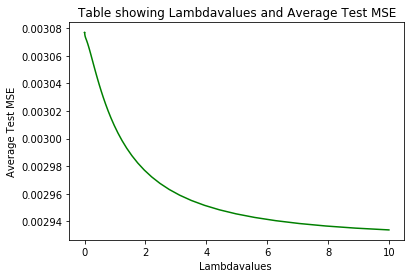

In [9]:
####### L2 REGULARIZATION PERFORMED ON DATASETS  

x_test=np.array(x_test_val)
y_test=np.array(y_value_test)
lambdavalues = np.logspace(-4,1,100)
total_test_mse=[]
best_value=999999
best_index=0
weight=[]
for i in lambdavalues:
    weights, mse_recorded, min_mse, min_index = L2reg(x_values, y_value, i)
    weight.append(weights)
    mse1,mse_mean = mse(x_test, weights, y_test)
    if mse_mean<best_value: 
        best_value = mse_mean 
        best_index = i
    total_test_mse.append(mse_mean)    
print("The MSE Mean obtained is:", total_test_mse) 
print("The parameters used were:", weight)
print("The lambda that gives the best fit is:", best_index)
plt.xlabel("Lambdavalues ")
plt.ylabel("Average Test MSE")
plt.title("Table showing Lambdavalues and Average Test MSE")
plt.plot(lambdavalues, total_test_mse, '-g')

In [ ]:
########### FEATURE SELECTION 

In [ ]:
#perform ridge regression on dataset using best lambda value from above

%matplotlib inline 
weights=np.zeros(123)
x=np.arange(5,123,1)
weightz, mse_recorded, min_mse, min_index = L2reg(x_values, y_value, 2.5)
xaxis=np.arange(5,128,1)
weights=weightz+weights
weights=weights/5

###PICK WEIGHTS BASED ON THESE TO SEE WHICH WEIGHTS MATTER

plt.plot(xaxis, weights[0], 'ro')
plt.plot(xaxis, weights[1], 'go')
plt.plot(xaxis, weights[2], 'o')
plt.plot(xaxis, weights[3], 'bo')
plt.plot(xaxis, weights[4], 'yo')
plt.xlabel("Columns")
plt.ylabel("Weights")
plt.title("Visualize")
plt.show()



In [ ]:
# pick weights 
# weights now have weights from 5 
weightz, mse_recorded, min_mse, min_index = L2reg(x_values, y_value, 2.5)
weights=weightz+weights
weights=weights/5
weights = weights.mean(0)
columns=[]
for i in range(len(weights)): 
    if (abs)(weights[i]) > 0.01: 
        columns.append(i+4)
# NOW MY COLUMNS HAVE FEATURE SELECTED 



In [ ]:
#### RETRAINING DATA WITH MINIMIZED FEATURES 

xtrainf, xtestf = gettingxvalues(train_data, test_data, columns)
ytrainf = gettingy(train_data, 127)
ytestf = gettingy(test_data,127)
weightf, mse_recordedf, min_msef, min_indexf = L2reg(xtrainf, ytrainf, 0)
msetest=mse(xtestf, weightf, ytestf)
print("The average value of msetest and averaged msetest:", msetest)

Ways to remove missing data 
- Expectation-maximisation method 
- Put in the new value based on other similar columns/rows 

